In [53]:
import string, nltk

import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plot

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn import metrics


In [41]:
# Dataset link: https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset?select=Fake.csv
true_df = pd.read_csv('True.csv')
fake_df = pd.read_csv('Fake.csv')

print(true_df.head())
print(fake_df.head())


                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   
                                               title  \
0   Donald Trump Sends Out Embarrassing Ne

In [42]:
print(true_df.isna().sum())
print(fake_df.isna().sum())

title      0
text       0
subject    0
date       0
dtype: int64
title      0
text       0
subject    0
date       0
dtype: int64


In [43]:
# Lets just use titles for fake news detection
true_df = true_df[['title']]
true_df['legit'] = 1

fake_df = fake_df[['title']]
fake_df['legit'] = 0

In [44]:
df = true_df.append(fake_df) 
df = df.sample(frac = 1) # Shuffle the dataset

In [45]:
df.head(10)

,title,legit
4113,Sarah Palin Calls For Executing Democratic ‘C...,0
9152,Obama to travel to Orlando on Thursday: White ...,1
2941,UNHINGED Trump Supporters Visit DC For Inaugu...,0
9036,Rubio says prospect of Trump president is 'wor...,1
20800,U.S. warns of sanctions on any country trading...,1
18039,Likely successor to Cuba's Castro rejects U.S....,1
14580,Germany to spend 10 million euros to help clea...,1
20609,Venezuela has problems fulfilling obligations ...,1
7588,Trevor Noah Notices This Odd Similarity Betwe...,0
3727,"Embroiled in controversies, Trump seeks boost ...",1


In [46]:
def remove_punctuations(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

df['title'] = df['title'].apply(remove_punctuations)

In [47]:
df.head()

,title,legit
4113,Sarah Palin Calls For Executing Democratic ‘C...,0
9152,Obama to travel to Orlando on Thursday White H...,1
2941,UNHINGED Trump Supporters Visit DC For Inaugu...,0
9036,Rubio says prospect of Trump president is worr...,1
20800,US warns of sanctions on any country trading w...,1


In [48]:
from nltk.corpus import stopwords

nltk.download('stopwords')
stopword = stopwords.words('english')

def remove_stopwords(text):
    words = [word for word in text.split()]
    return ' '.join([word for word in words if word not in stopword])

df['title'] = df['title'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rushikesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
df.head()

,title,legit
4113,Sarah Palin Calls For Executing Democratic ‘Ch...,0
9152,Obama travel Orlando Thursday White House,1
2941,UNHINGED Trump Supporters Visit DC For Inaugur...,0
9036,Rubio says prospect Trump president worrisome,1
20800,US warns sanctions country trading North Korea,1


In [56]:
xtrain, xtest, ytrain, ytest = train_test_split(df['title'], df['legit'], test_size=0.2, random_state=1)

In [57]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(35918,)
(35918,)
(8980,)
(8980,)


In [58]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

pipe.fit(xtrain, ytrain)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', LogisticRegression())])

In [67]:
predictions = pipe.predict(xtest) 

<AxesSubplot:>

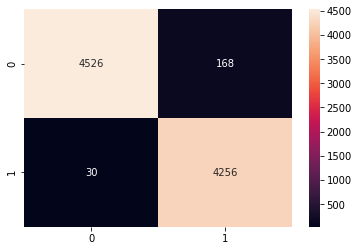

In [66]:
sb.heatmap(metrics.confusion_matrix(ytest, predictions), annot=True, fmt="0.4g")

In [68]:
print(metrics.classification_report(ytest, predictions)) 

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      4694
           1       0.96      0.99      0.98      4286

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



Woho! 98% accuracy!